# Polarization's anisotropies of the CMB

## In this code I compute the Cls of the polarization map

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp 
import pymaster as nmt

In [2]:
#In this jupyter notebook it shows the power spectra of a polarization map
#The pseudo-Cl estimator of the angular power spectrum of a spin-2 field and a spin-1 field.
# read map
pol_map=hp.read_map('/home/akozameh/COM_CMB_IQU-smica_2048_R3.00_hm2.fits', [1,2])

In [3]:
# Resolution 
map_pol=hp.pixelfunc.ud_grade(pol_map, 1024)

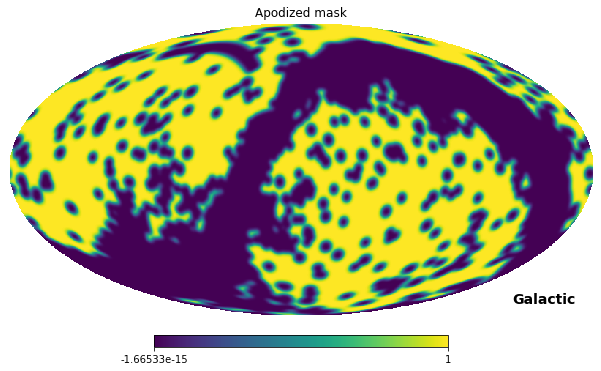

In [10]:
# Read mask and apodize it on a scale of ~1deg
mask= nmt.mask_apodization(hp.read_map('/home/akozameh/cmblss/data/COM_Mask_CMB-common-Mask-Pol_2048_R3.00.fits'),
                            1., apotype="Smooth")
hp.mollview(mask, coord=['C', 'G'], title='Apodized mask')
plt.show()


In [6]:
#Nside =256 resolution of the map
mask=hp.pixelfunc.ud_grade(mask,1024)

In [13]:
# Read healpix maps and initialize a spin-0 and spin-2 field
f_0 = nmt.NmtField(mask, [hp.read_map('/home/akozameh/COM_CMB_IQU-smica_2048_R3.00_hm2.fits', field=0)])
f_2 = nmt.NmtField(mask, hp.read_map('/home/akozameh/COM_CMB_IQU-smica_2048_R3.00_hm2.fits', field=[1, 2]))

In [14]:
# Initialize binning scheme with 4 ells per bandpower
b = nmt.NmtBin.from_nside_linear(1024, 4)

In [15]:
# Compute MASTER estimator
# spin-0 x spin-0
cl_00 = nmt.compute_full_master(f_0, f_0, b)
# spin-0 x spin-2
cl_02 = nmt.compute_full_master(f_0, f_2, b)
# spin-2 x spin-2
cl_22 = nmt.compute_full_master(f_2, f_2, b)

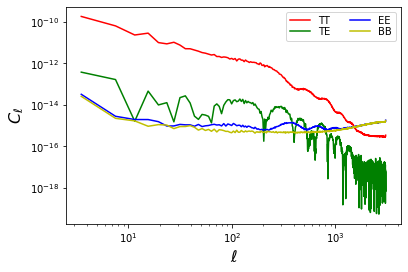

In [18]:
# Plot results
l = b.get_effective_ells()
plt.plot(l, cl_00[0], 'r-', label='TT')
plt.plot(l, np.fabs(cl_02[0]), 'g-', label='TE')
plt.plot(l, cl_22[0], 'b-', label='EE')
plt.plot(l, cl_22[3], 'y-', label='BB')
plt.loglog()
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$C_\\ell$', fontsize=16)
plt.legend(loc='upper right', ncol=2, labelspacing=0.1)
plt.show()

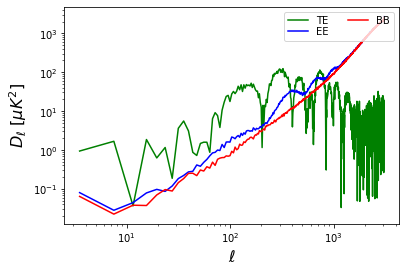

In [24]:
plt.plot(l, np.fabs(cl_02[0])*l*(l+1)*(1e12)/2/np.pi, 'g-', label='TE')
plt.plot(l, cl_22[0]*l*(l+1)*(1e12)/2/np.pi, 'b-', label='EE')
plt.plot(l, cl_22[3]*l*(l+1)*(1e12)/2/np.pi, 'r-', label='BB')
plt.loglog()
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$D_\\ell~[\mu K^2]$', fontsize=16)
plt.legend(loc='upper right', ncol=2, labelspacing=0.1)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


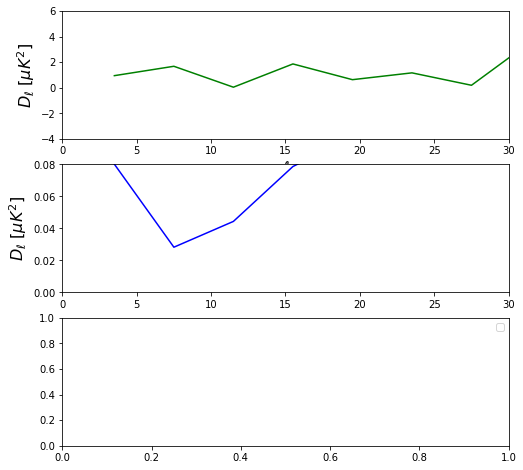

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


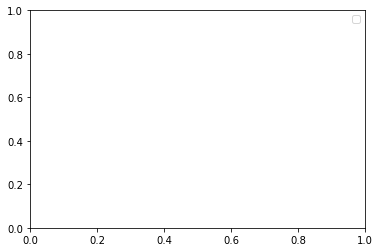

In [33]:
# Showing TE,EE, BB in low l
fig,axs= plt.subplots(3, figsize=(8,8))
#========== TE plot ======================
axs[0].plot(l, np.fabs(cl_02[0])*l*(l+1)*(1e12)/2/np.pi, 'g-', label='TE')
axs[0].set_xlim(0,30)
axs[0].set_ylim(-4,6)
axs[0].set_xlabel('$\\ell$', fontsize=16)
axs[0].set_ylabel('$D_\\ell~[\mu K^2]$', fontsize=16)

# =========== EE plot ==================
axs[1].plot(l, cl_22[0]*l*(l+1)*(1e12)/2/np.pi, 'b-', label='EE')
axs[1].set_xlim(0,30)
axs[1].set_ylim(0.00,0.08)
axs[1].set_ylabel('$D_\\ell~[\mu K^2]$', fontsize=16)
plt.legend(loc='upper right')
plt.show()
#============= BB plot ============================
axs[2].plot(l, cl_22[3]*l*(l+1)*(1e12)/2/np.pi, 'r-', label='BB')
axs[2].set_xlim(0,30)
axs[2].set_ylim(-0.07,0.07)
axs[2].set_xlabel('$\\ell$', fontsize=16)
axs[2].set_ylabel('$D_\\ell~[\mu K^2]$', fontsize=16)
#axs.set_xlabel('$\\ell$', fontsize=16)
#axs.ylabel('$D_\\ell~[\mu K^2]$', fontsize=16)
plt.legend(loc='upper right')
plt.show()

In [ ]:
Axes.set_xlim